In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

### Task 3
- There are two columns in the measurement record log ﬁle. The ﬁrst represents the measured distance (in cm) and the second column represents the height (in pixel) measured from the terminal

In [2]:
camera_data = pd.read_csv(r'camera_reading_task3.csv',header=None)
camera_module = pd.read_csv(r'camera_module_calibration_task3.csv',header=None)

print("Shape of the camera data is: ", camera_data.shape)
print("Shape of the camera module data is: ", camera_module.shape)


Shape of the camera data is:  (1007, 8)
Shape of the camera module data is:  (23, 2)


In [3]:
# pixel to cm conversion
px2cm = 0.026458333

# Distance of camera pinhole and the IR detector = 1.6 cm
distance_pinhole_IR = 1.6 

# Distance of the wall and the wooden list = 5cm
distance_ww = 5

h0 = 11.5 # cm

# The distance between the QR code and the robot camera (in cm). In the description refered as x3
distance = camera_module.iloc[:,0] 

# The height of qr code detected by the camera (from pixels to cm)
height = camera_module.iloc[:,1] #*px2cm



### Task 3a
There are two columns in the measurement record log ﬁle. The ﬁrst represents the
measured distance (in cm) and the second column represents the height (in pixel)
measured from the terminal. You need to plot the data as described above and
determine the gradient and bias. Write down the results in your report. Note that,
you also need to consider the distance of the camera from the surface of the robot
which is provided in readme.txt ﬁle with the data.There are two columns in the measurement record log ﬁle. The ﬁrst represents the
measured distance (in cm) and the second column represents the height (in pixel)
measured from the terminal. You need to plot the data as described above and
determine the gradient and bias. Write down the results in your report. Note that,
you also need to consider the distance of the camera from the surface of the robot
which is provided in readme.txt ﬁle with the data.
#### $\begin{bmatrix} y_1 \\ y_2 \end{bmatrix} = -\frac{f}{x_3}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$


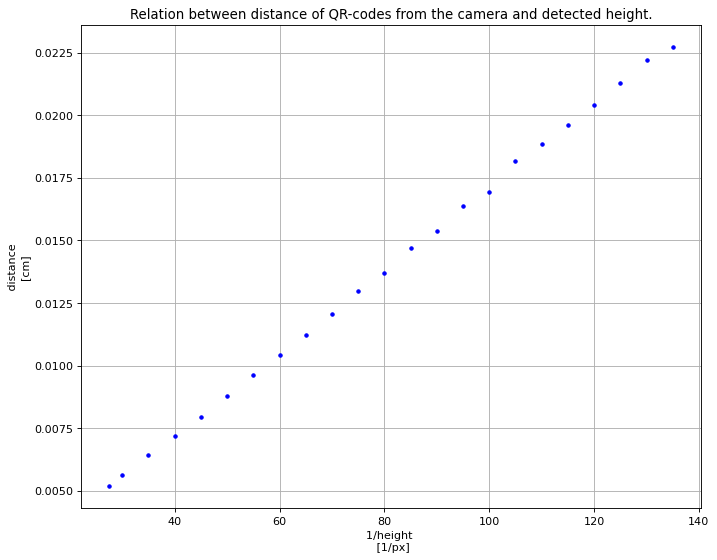

In [4]:
# Plotting the linear acceleration 
plt.figure(1 ,figsize=(10, 8), dpi=80)

plt.plot(distance, 1/height,'b.')
plt.grid(b=None, which='major', axis='both')
plt.title("Relation between distance of QR-codes from the camera and detected height.")
plt.xlabel("1/height \n [1/px]")
plt.ylabel(" distance \n[cm]")

plt.savefig('camera_module_task3.png')
plt.show()

In [5]:
# Finding weights and bias  

# y = ax + b

X = np.c_[1/(height*px2cm),np.ones(len(height))]
Y = distance
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

b = theta[1]
gradient = theta[0]

print('Gradient:',gradient)
print('Bias:',b)



Gradient: 159.65820606543207
Bias: -3.2801897881800066


### Task 3b
Determine the focal length in pixel from the Equation (3), given that the height h0
of the QR-code is 11.5 cm.Determine the focal length in pixel from the Equation (3), given that the height h0
of the QR-code is 11.5 cm.

$x_3 = \frac{h_0 f}{h}+ b$

In [6]:
real_distance = distance + distance_pinhole_IR + distance_ww

#height*x3 = h0*f + height*b
f = (height / h0)*(real_distance - b)
print('Focal length is:',np.mean(f))

Focal length is: 574.9523036713214


In [7]:
print(f)

0     627.337098
1     617.275981
2     608.809531
3     602.899685
4     601.295992
5     593.594925
6     586.742586
7     583.347671
8     579.507556
9     576.526587
10    568.328227
11    570.543813
12    561.030687
13    564.540203
14    556.321007
15    563.733148
16    549.426995
17    552.491309
18    553.816494
19    553.402548
20    551.249471
21    547.357264
22    554.324204
dtype: float64
